
# Clustering Application in images

Quantization is a lossy compression technique that consists of grouping a whole range of values
into a single value. If we quantize the color of an image, we reduce the number of colors needed
to represent it and the file size of the image decreases. This is important, for example, to render
an image on devices that only support a limited number of colors.

Quantize the color of the following image using k-means.
Import the libraries.

In [98]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

from sklearn.cluster import KMeans

In [99]:
# Open the image
I = Image.open("holi.jpg")

Load and transform the image into a matrix and render it.

<Figure size 1600x900 with 0 Axes>

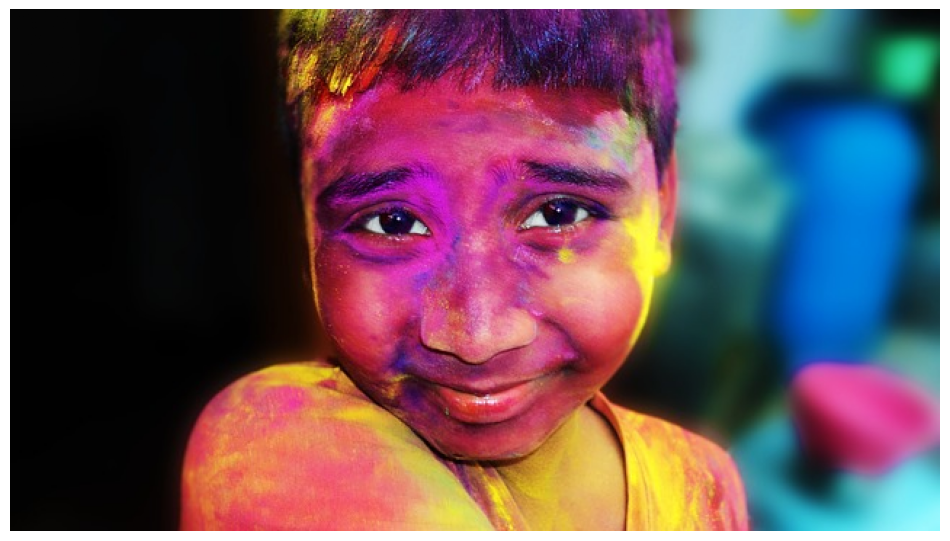

In [100]:
#  Transform into a matrix and  en una matriz y mostramos.
I1 = np.asarray(I,dtype=np.float32)/255
fig = plt.figure()
plt.figure(figsize=(12,12))
plt.imshow(I1)
plt.axis('off')
plt.show()

In this case, our objects are pixels and their characteristics are the intensities of red, green and
blue associated with each one. Therefore, we have as many data or objects as pixels and three
characteristics or properties for each pixel. We will have as many different colors as different RGB
ternaries. Let’s count the number of different colors.

In [101]:
# In this case our objects are the pixels and their characteristics are
# red, green, blue intensities associated with each pixels.


w, h = I.size
colors = I.getcolors(w * h)
num_colors = len(colors)
num_pixels = w*h

print (u'Number of pixels  = ', num_pixels)
print (u'Number of colors = ', num_colors)

Number of pixels  =  229760
Number of colors =  118152


In order to apply k-means, we need a matrix with as many rows as pixels and for each row/pixel
there are 3 columns, one for each color intensity (red, green and blue). Extract each channel
separately, convert the matrices into one-dimensional matrices and construct the three-column
matrix described above.

In [102]:
R = I1[:,:,0]
G = I1[:,:,1]
B = I1[:,:,2]

# Convert the matrices into one dimensional matrices ad build
# the three-column matrix described above

XR = R.reshape((-1, 1))
XG = G.reshape((-1, 1))
XB = B.reshape((-1, 1))

X = np.concatenate((XR,XG,XB),axis=1)

We will make clusters of the 172388 colors in 64 groups or new colors, which will correspond to the centroids obtained with the k-means.

In [104]:
n = 64
k_means = KMeans(n_clusters=n, n_init='auto')
k_means.fit(X)

centroides = k_means.cluster_centers_
etiquetas = k_means.labels_

From the labels and the colors (red, green and blue intensities) of the centroids, reconstruct the
image matrix using only the colors of the centroids.

In [105]:
m = XR.shape
for i in range(m[0]):
    XR[i] = centroides[etiquetas[i]][0]
    XG[i] = centroides[etiquetas[i]][1]
    XB[i] = centroides[etiquetas[i]][2]
XR.shape = R.shape
XG.shape = G.shape
XB.shape = B.shape
XR = XR[:, :, np.newaxis]
XG = XG[:, :, np.newaxis]
XB = XB[:, :, np.newaxis]

Y = np.concatenate((XR,XG,XB),axis=2)


Represent the image again with 64 colors.

<Figure size 1600x900 with 0 Axes>

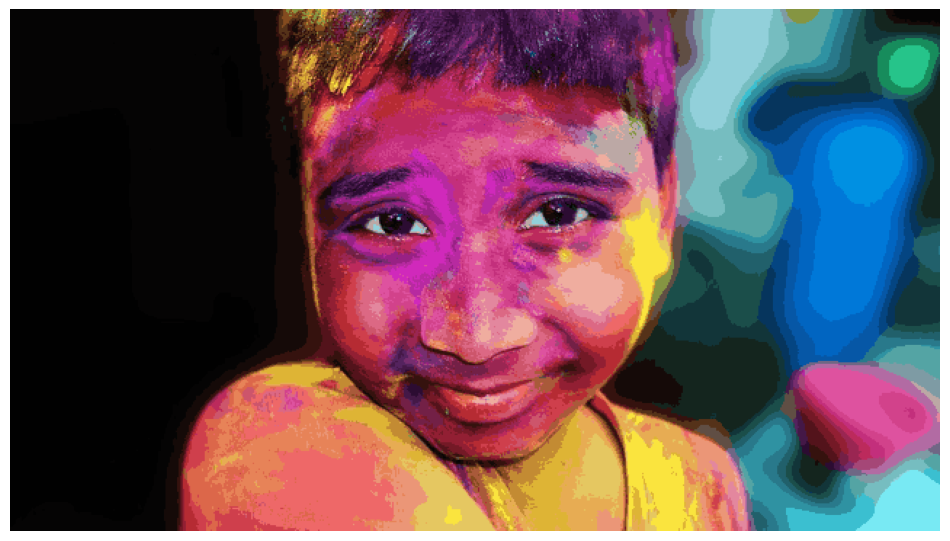

In [107]:
fig = plt.figure()
plt.figure(figsize=(12,12))
plt.imshow(Y)
plt.axis('off')
plt.show()